In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [177]:
#df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
#df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')


In [220]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [179]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [181]:
num_variables =[]

for var in df_train.columns:
    if (df_train[var].dtype == int) & (var != 'Id') & (var !='SalePrice'):
        num_variables.append(var)
    
print(num_variables)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


**Quick and dirty LR model**

In [182]:
#target variable
target_var = ['SalePrice']

X = df_train[num_variables]
y= df_train[target_var]

In [183]:
#train test splitting the dataset into 70% train and 30% test
seed=1234
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=seed)

In [184]:
#preparing a quick LinearRegression model 
lr_dirty = LinearRegression()
lr_dirty.fit(X_train,y_train)
y_pred_dirty = lr_dirty.predict(X_test)
print("R2: ", lr_dirty.score(X_test,y_test))

#measuring the RMSE of the model
rmse_dirty = MSE(y_test, y_pred_dirty)**(1/2)
print("RMSE: ", rmse_dirty)

R2:  0.8347178104178903
RMSE:  28741.593822465322


In [185]:
y_pred_dirty[:5]

array([[240650.69030367],
       [322942.82044721],
       [174234.22134361],
       [ 48682.32867038],
       [245847.38693428]])

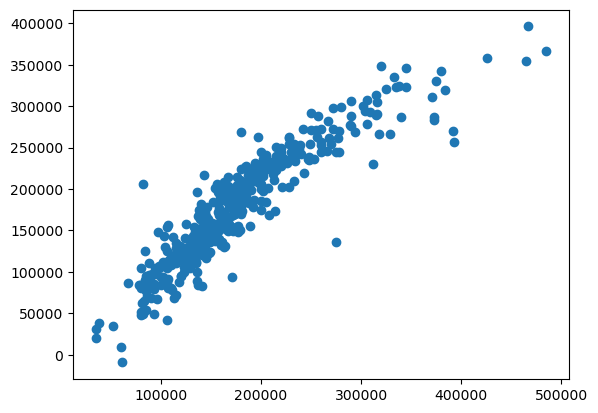

In [186]:
plt.scatter(y_test,y_pred_dirty)

**Residual Histogram**

/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

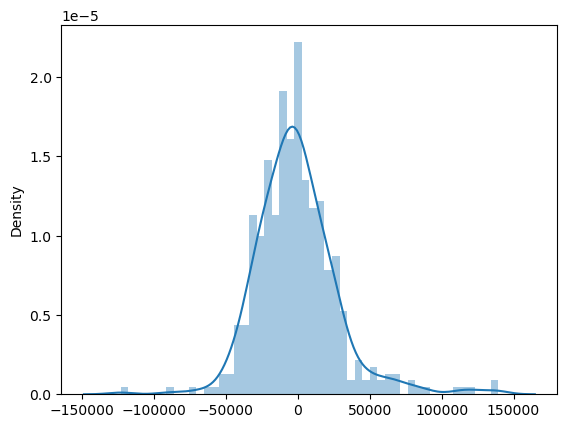

In [187]:
sns.distplot((y_test-y_pred_dirty),bins=50)

In [188]:
df_test[num_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   BsmtFinSF1     1458 non-null   float64
 7   BsmtFinSF2     1458 non-null   float64
 8   BsmtUnfSF      1458 non-null   float64
 9   TotalBsmtSF    1458 non-null   float64
 10  1stFlrSF       1459 non-null   int64  
 11  2ndFlrSF       1459 non-null   int64  
 12  LowQualFinSF   1459 non-null   int64  
 13  GrLivArea      1459 non-null   int64  
 14  BsmtFullBath   1457 non-null   float64
 15  BsmtHalfBath   1457 non-null   float64
 16  FullBath       1459 non-null   int64  
 17  HalfBath       1459 non-null   int64  
 18  BedroomA

In [189]:
## filling NaNs with 0s
df_test[num_variables] = df_test[num_variables].fillna(0)

#predicting on the test dataset (validation)
output_pred = lr_dirty.predict(df_test[num_variables]).ravel()  # or predictions.flatten() to make it a 1D array


#creating a dataframe with Id and predicted SalePrice 
output = pd.DataFrame({'Id': df_test['Id'],
                       'SalePrice': output_pred})

output.head()

,Id,SalePrice
0,1461,125693.088215
1,1462,152363.769775
2,1463,175547.100820
3,1464,204434.177504
4,1465,199534.741493


In [190]:
#output.to_csv('/kaggle/working/submission.csv', index=False)
output.to_csv('submission.csv', index=False)

output.head()

,Id,SalePrice
0,1461,125693.088215
1,1462,152363.769775
2,1463,175547.100820
3,1464,204434.177504
4,1465,199534.741493


# EXPLORATORY DATA ANALYSIS

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

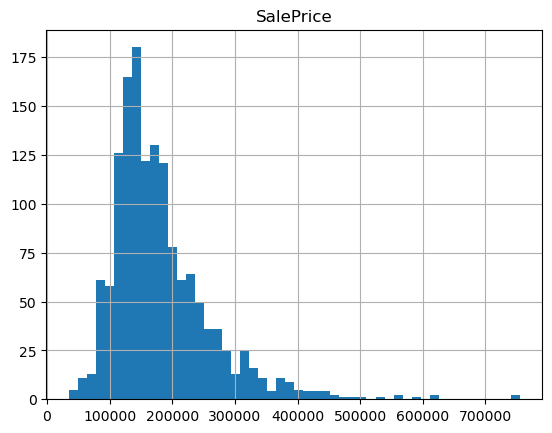

In [191]:
df_train[target_var].hist(bins=50)


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomA

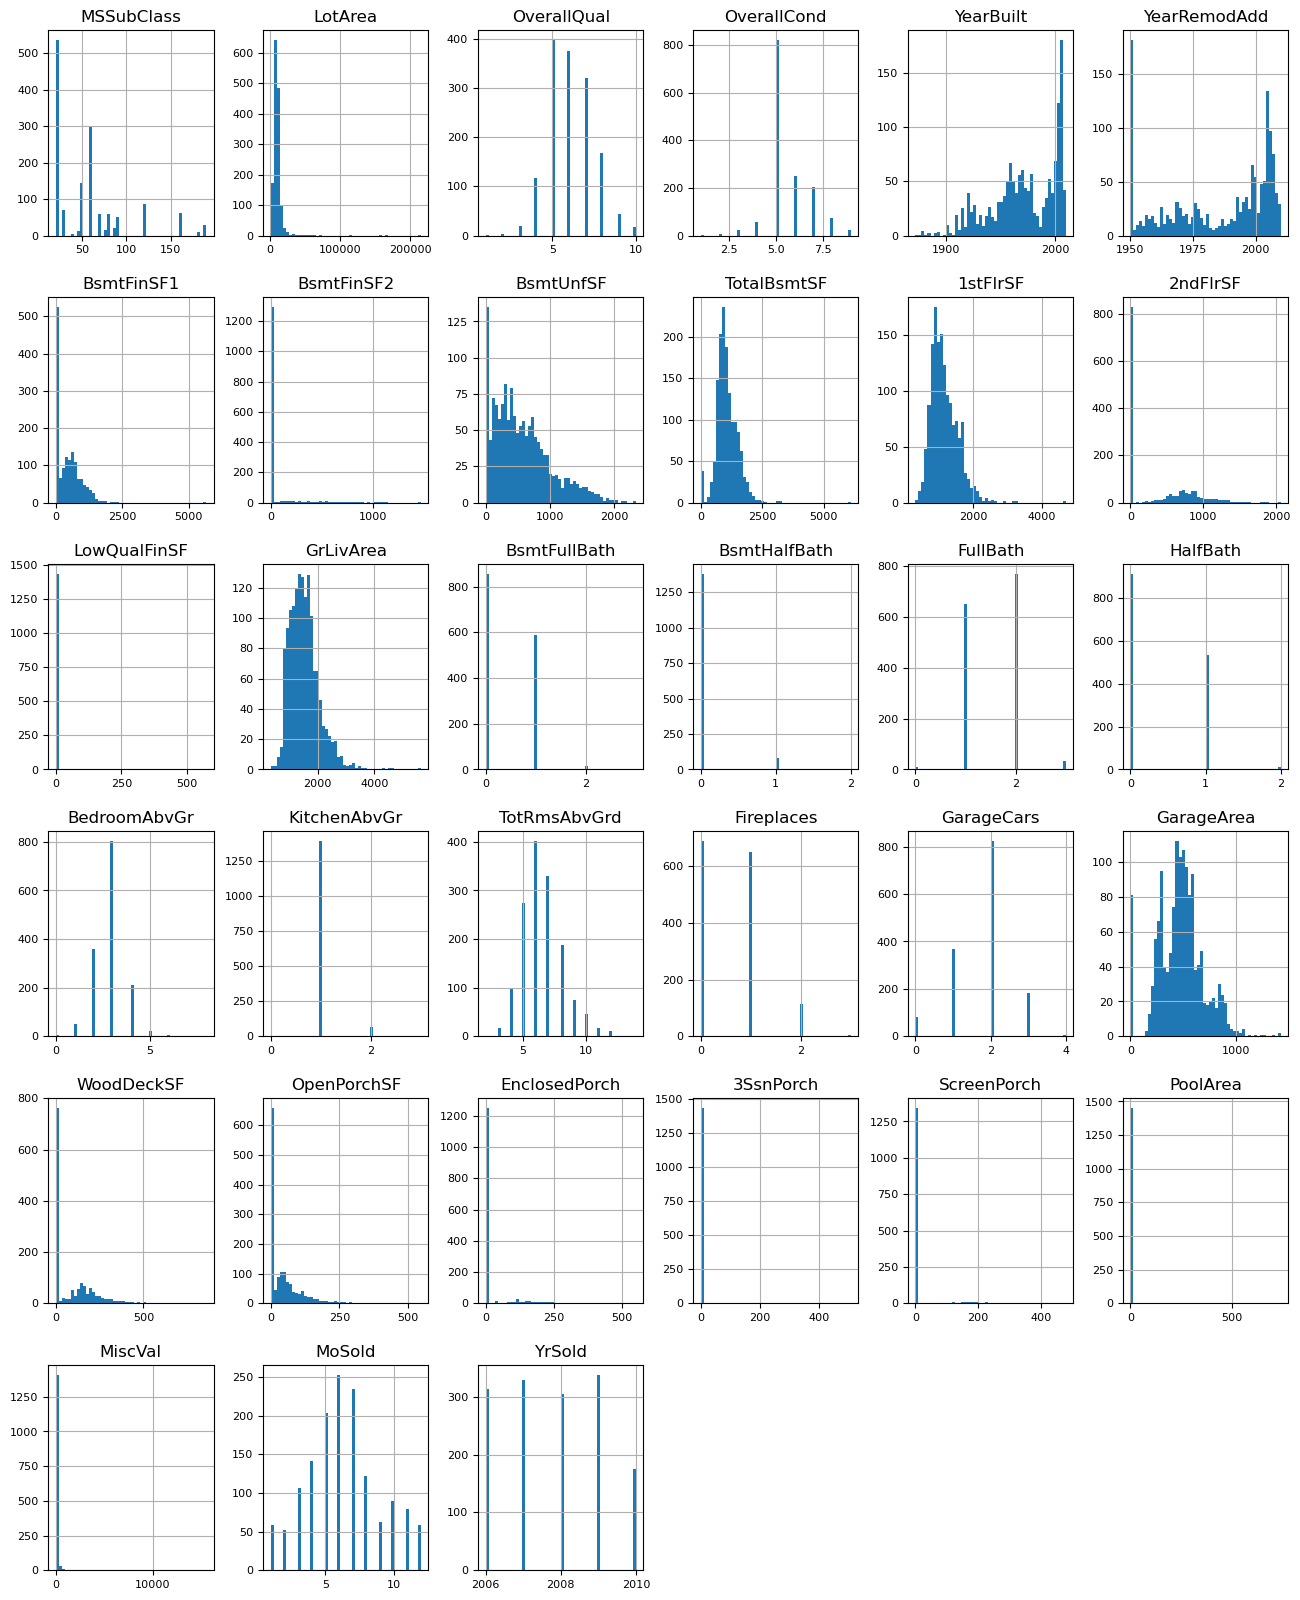

In [192]:
df_train[num_variables].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Selecting Features based on p-value (with a 95% confidence level)**

We define a step-wise function using the library statsmodels to calculate the p-values of the variables after fitting them to a model. Sklearn doesn't have this option so we use an OLS algorithm using statsmodels.

The defined function is a wrapper and what we do is fit a model iterating over the different variables, adding and removing variables. The iteration goes on until the model fitted uses only the variables that have p-values below the defined threshold. In this case 0.05 as we want our model to have a 95% confidence interval.  

As a note, stepwise wrappers don't estimate correlation between variables so this has to be taken into account.

In [193]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Add {best_feature} with p-value {best_pval:.6f}")
        if not changed:
            break
    return included

# Assuming X is your feature matrix and y is your target variable
selected_features = stepwise_selection(X, y)

print("Selected features: ", selected_features)

Add OverallQual with p-value 0.000000
Add GrLivArea with p-value 0.000000
Add BsmtFinSF1 with p-value 0.000000
Add GarageCars with p-value 0.000000
Add MSSubClass with p-value 0.000000
Add YearBuilt with p-value 0.000000
Add BedroomAbvGr with p-value 0.000000
Add OverallCond with p-value 0.000000
Add LotArea with p-value 0.000001
Add TotRmsAbvGrd with p-value 0.000300
Add WoodDeckSF with p-value 0.000562
Add ScreenPorch with p-value 0.000443
Add BsmtFullBath with p-value 0.001442
Add TotalBsmtSF with p-value 0.002003
Add KitchenAbvGr with p-value 0.011605
Add YearRemodAdd with p-value 0.036076
Add Fireplaces with p-value 0.034539
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'YearBuilt', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'TotRmsAbvGrd', 'WoodDeckSF', 'ScreenPorch', 'BsmtFullBath', 'TotalBsmtSF', 'KitchenAbvGr', 'YearRemodAdd', 'Fireplaces']


In [194]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [195]:
#preparing a  LinearRegression model on selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train_selected,y_train)
y_pred_selected = lr_selected.predict(X_test_selected)
print("R2: ", lr_selected.score(X_test_selected,y_test))

#measuring the RMSE of the model
rmse_selected = MSE(y_test, y_pred_selected)**(1/2)
print("RMSE: ", rmse_selected)

R2:  0.8450678151162719
RMSE:  27827.144393886567


By utilizing only the selected features from the stepwise wrapper, we improved slightly the R2 of our model.

**Instantiating a Linear Regression, Decision Tree Regressor, Ridge, Lasso and Random Forest Regressor**



We will try different algorithms and compare their scores.

In [196]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(min_samples_leaf=0.16 ,max_depth=4 ,random_state=seed)
rfr= RandomForestRegressor(n_estimators = 100, min_samples_leaf=0.16 ,max_depth=4 ,random_state=seed, n_jobs=-1)
gbr = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf=0.16 ,max_depth=4 ,random_state=seed)
lasso = Lasso()
ridge = Ridge()

#creating a list of regressors
regressors = [('Linear Regression', lr),
            ('Decision Tree Regressor', dtr),               
               ('Random Forest Regressor', rfr),
             ('Gradient Boosting Regressor', gbr),
             ('Lasso Regression', lasso),
             ('Ridge Regression Regressor', ridge)]


In [197]:
# creating an empty list to store the results of the differnt algorithms
model_scores = []

# Iterate over the defined list of tuples containing the regressors
for reg_name, reg in regressors:
    #fit reg to the training set    
    reg.fit(X_train_selected, y_train)
    # Predict the labels of the test set    
    y_pred = reg.predict(X_test_selected)
    #Measure the RMSE
    rmse = MSE(y_test, y_pred)**(1/2)
    # Evaluate the R2 of reg on the test set
    score = reg.score(X_test_selected, y_test)

    #appending to model_scores
    model_scores.append([reg_name, score, rmse])
    
    # Evaluate the R2 of reg on the test set
    print('{:s} : {:.4f}'.format(reg_name, score), "RMSE", rmse)

Linear Regression : 0.8451 RMSE 27827.144393886567
Decision Tree Regressor : 0.6172 RMSE 43741.27398823147


/var/folders/0k/2zhx10hd5qz8b06qzfvsxwn80000gn/T/ipykernel_63811/2954961571.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train_selected, y_train)


Random Forest Regressor : 0.5001 RMSE 49985.983242490685
Gradient Boosting Regressor : 0.8381 RMSE 28445.197593617973
Lasso Regression : 0.8451 RMSE 27826.914219199152
Ridge Regression Regressor : 0.8451 RMSE 27824.552293523833


/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
models_df = pd.DataFrame(model_scores, columns=['model', 'score','rmse'])
models_df = models_df.sort_values(['score','rmse'], ascending=[False,True])
models_df

,model,score,rmse
5,Ridge Regression Regressor,0.845097,27824.552294
4,Lasso Regression,0.845070,27826.914219
0,Linear Regression,0.845068,27827.144394
3,Gradient Boosting Regressor,0.838109,28445.197594
1,Decision Tree Regressor,0.617187,43741.273988
2,Random Forest Regressor,0.500080,49985.983242


**Plotting the different models and their R2 score**

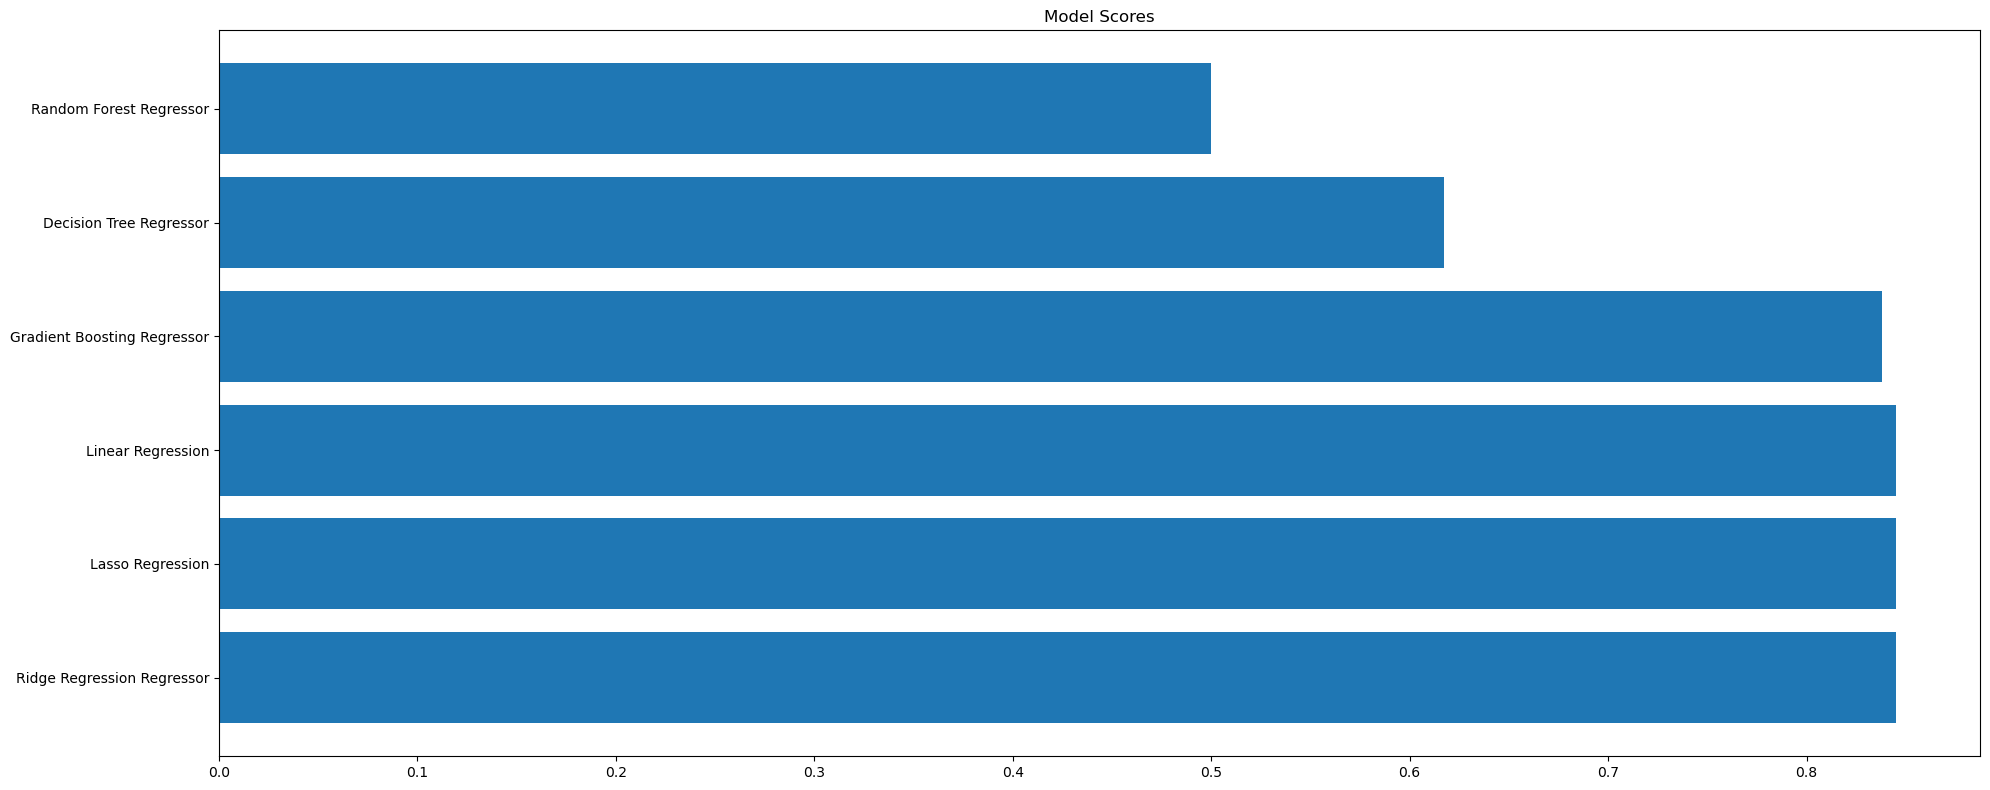

In [199]:
plt.figure(figsize=(20, 8))
plt.barh(models_df['model'], models_df['score'])
plt.title('Model Scores')


plt.tight_layout()
plt.show()

# **Let's try some feature engineering**

**Adding TotalSqf + 2nd_floor (boolean)**

In [200]:
df_train['total_sqf'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['2nd_floor'] = (df_train['2ndFlrSF'] > 0).astype(int)


df_train = df_train.drop(columns=['1stFlrSF', '2ndFlrSF'], axis=1)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPo

**Adding logarithmic variables**

In [201]:
to_log = ['LotArea', 'BsmtUnfSF','TotalBsmtSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF','GrLivArea']

log_var = []
for var in to_log:
    df_train['log_'+var] = np.log(df_train[var] + 1)
    log_var.append('log_'+var)


**Creating log variables to improve the distribution**

array([[<AxesSubplot:title={'center':'log_LotArea'}>,
        <AxesSubplot:title={'center':'log_BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'log_TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'log_GarageArea'}>,
        <AxesSubplot:title={'center':'log_WoodDeckSF'}>,
        <AxesSubplot:title={'center':'log_OpenPorchSF'}>],
       [<AxesSubplot:title={'center':'log_GrLivArea'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

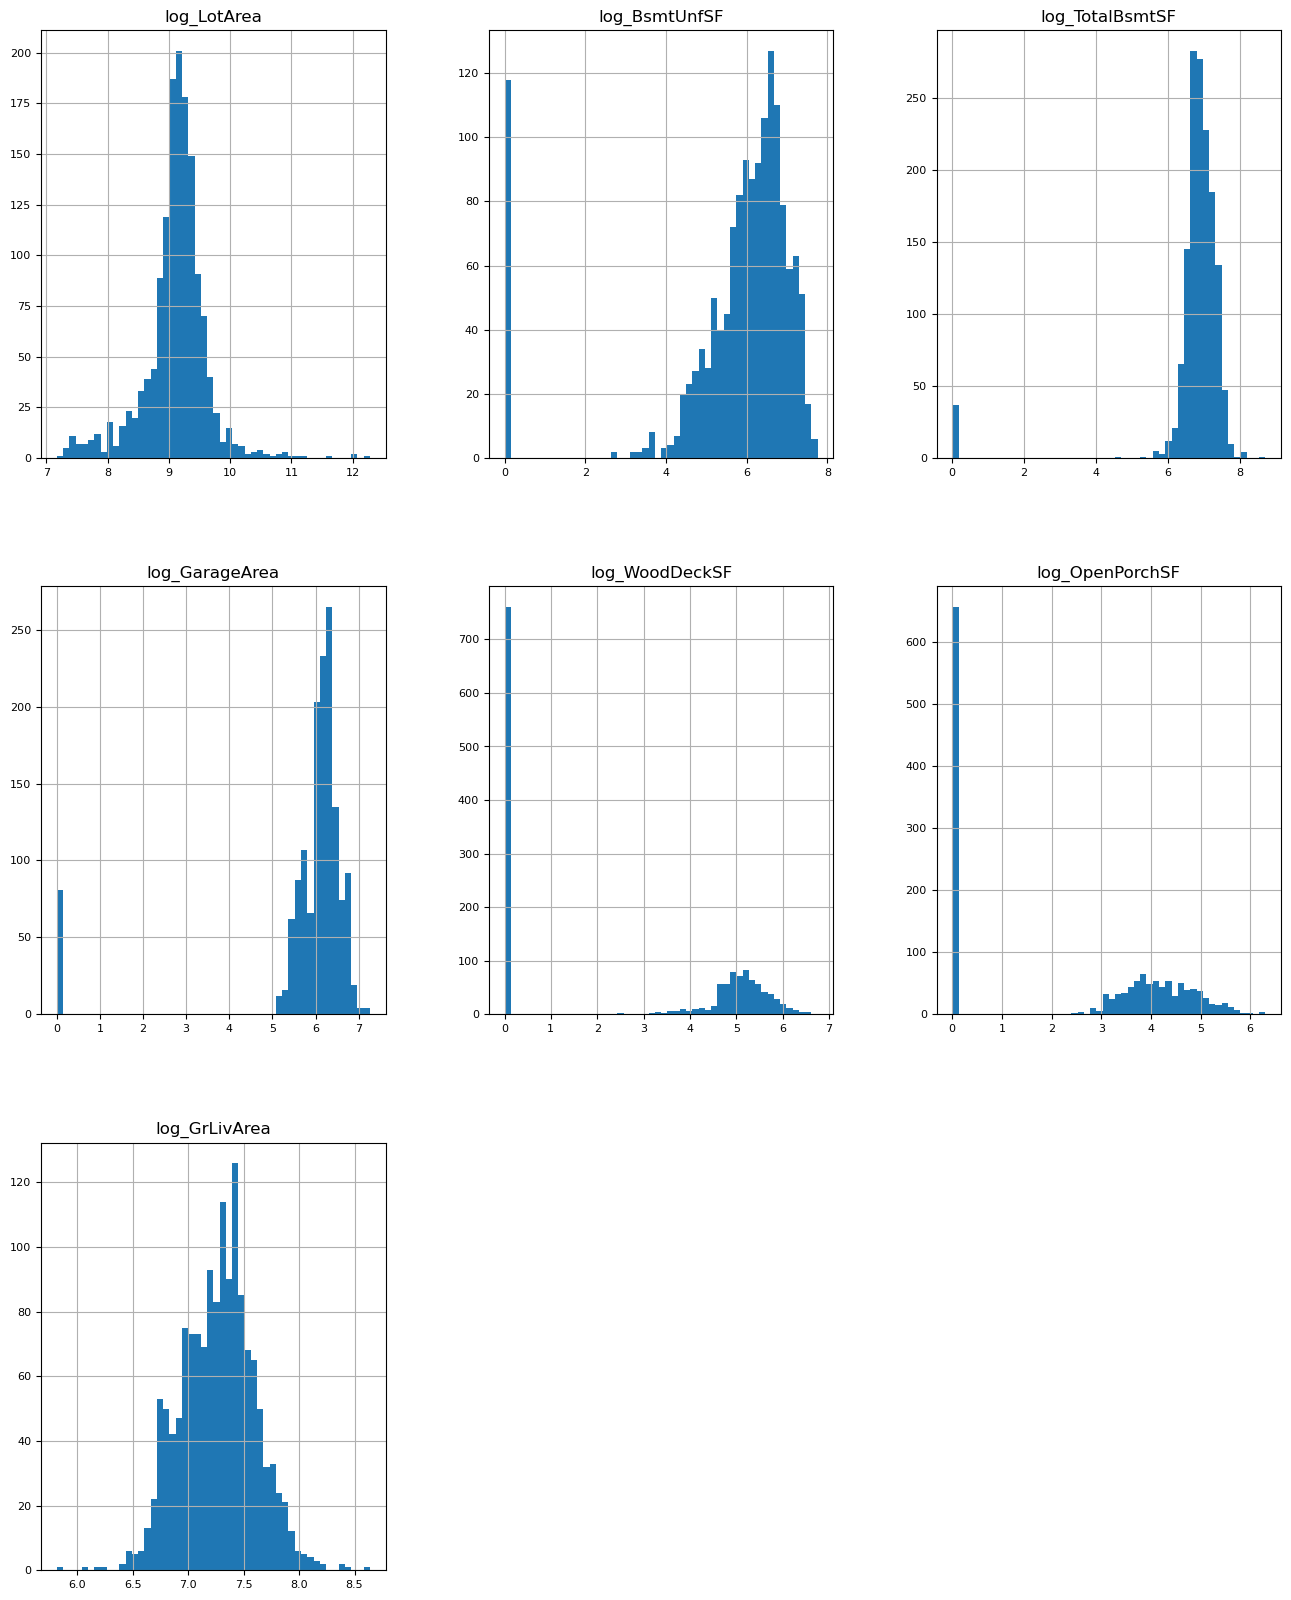

In [202]:
df_train[log_var].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [203]:
# Drop the original variables
df_log = df_train.drop(to_log, axis=1)
df_log

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,total_sqf,2nd_floor,log_LotArea,log_BsmtUnfSF,log_TotalBsmtSF,log_GarageArea,log_WoodDeckSF,log_OpenPorchSF,log_GrLivArea
0,1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,208500,1710,1,9.042040,5.017280,6.753438,6.308098,0.000000,4.127134,7.444833
1,2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,181500,1262,0,9.169623,5.652489,7.141245,6.133398,5.700444,0.000000,7.141245
2,3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,223500,1786,1,9.328212,6.075346,6.825460,6.411818,0.000000,3.761200,7.488294
3,4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,140000,1717,1,9.164401,6.293419,6.629363,6.466145,0.000000,3.583519,7.448916
4,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,250000,2198,1,9.565284,6.196444,7.044033,6.729824,5.262690,4.442651,7.695758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,175000,1647,1,8.976894,6.860664,6.860664,6.133398,0.000000,3.713572,7.407318
1456,1457,20,RL,85.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,210000,2073,0,9.486152,6.380123,7.341484,6.216606,5.857933,0.000000,7.637234
1457,1458,70,RL,66.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,266500,2340,1,9.109746,6.777647,7.050123,5.533389,0.000000,4.110874,7.758333
1458,1459,20,RL,68.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,142125,1078,0,9.181735,0.000000,6.983790,5.484797,5.905362,0.000000,6.983790


In [204]:
df_log.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeatur

In [205]:
## creating a log variable of the "SalePrice"
df_log['log_sale_price'] = np.log(df_log['SalePrice'])
df_log.drop("SalePrice", axis=1, inplace=True)

<AxesSubplot:>

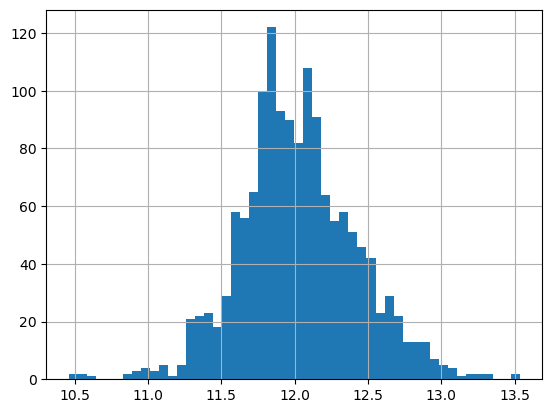

In [206]:
df_log['log_sale_price'].hist(bins=50)

In [207]:
X_log = df_log.select_dtypes(include=['int64', 'float64'])
X_log.drop(columns=['log_sale_price','Id'], axis=1, inplace=True)

y_log = df_log['log_sale_price']

In [208]:
#X_log.dtypes

print(X_log.isnull().sum())

X_log.fillna(0, inplace=True)

MSSubClass           0
LotFrontage        259
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           8
BsmtFinSF1           0
BsmtFinSF2           0
LowQualFinSF         0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageYrBlt         81
GarageCars           0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
MoSold               0
YrSold               0
total_sqf            0
2nd_floor            0
log_LotArea          0
log_BsmtUnfSF        0
log_TotalBsmtSF      0
log_GarageArea       0
log_WoodDeckSF       0
log_OpenPorchSF      0
log_GrLivArea        0
dtype: int64


In [209]:
selected_features_log = stepwise_selection(X_log, y_log)
selected_features_log

Add OverallQual with p-value 0.000000
Add log_GrLivArea with p-value 0.000000
Add YearBuilt with p-value 0.000000
Add log_LotArea with p-value 0.000000
Add OverallCond with p-value 0.000000
Add BsmtFullBath with p-value 0.000000
Add GarageCars with p-value 0.000000
Add 2nd_floor with p-value 0.000000
Add KitchenAbvGr with p-value 0.000000
Add Fireplaces with p-value 0.000003
Add log_TotalBsmtSF with p-value 0.000012
Add YearRemodAdd with p-value 0.000145
Add ScreenPorch with p-value 0.000523
Add BsmtFinSF1 with p-value 0.003263
Add PoolArea with p-value 0.014770
Add log_WoodDeckSF with p-value 0.025952
Add YrSold with p-value 0.041260


['OverallQual',
 'log_GrLivArea',
 'YearBuilt',
 'log_LotArea',
 'OverallCond',
 'BsmtFullBath',
 'GarageCars',
 '2nd_floor',
 'KitchenAbvGr',
 'Fireplaces',
 'log_TotalBsmtSF',
 'YearRemodAdd',
 'ScreenPorch',
 'BsmtFinSF1',
 'PoolArea',
 'log_WoodDeckSF',
 'YrSold']

In [210]:
df_log_selected = df_log[selected_features_log]


df_log_selected = df_log_selected.fillna(0)
df_log_selected.isnull().sum()

OverallQual        0
log_GrLivArea      0
YearBuilt          0
log_LotArea        0
OverallCond        0
BsmtFullBath       0
GarageCars         0
2nd_floor          0
KitchenAbvGr       0
Fireplaces         0
log_TotalBsmtSF    0
YearRemodAdd       0
ScreenPorch        0
BsmtFinSF1         0
PoolArea           0
log_WoodDeckSF     0
YrSold             0
dtype: int64

In [211]:
len(df_log_selected.columns)

17

In [212]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_log_selected, y_log , test_size=0.3, random_state=seed)



In [213]:
# creating an empty list to store the results of the differnt algorithms
model_scores_log = []

# Iterate over the defined list of tuples containing the regressors
for reg_name, reg in regressors:
    #fit reg to the training set    
    reg.fit(X_train_log, y_train_log)
    # Predict the labels of the test set    
    y_pred = reg.predict(X_test_log)
    #Measure the RMSE
    rmse = MSE(y_test_log, y_pred)**(1/2)
    # Evaluate the R2 of reg on the test set
    score = reg.score(X_test_log, y_test_log)

    #appending to model_scores
    model_scores_log.append([reg_name, score, rmse])
    
    # Evaluate the R2 of reg on the test set
    print('{:s} : {:.4f}'.format(reg_name, score), "RMSE", rmse)

Linear Regression : 0.8734 RMSE 0.13879352671587408
Decision Tree Regressor : 0.6279 RMSE 0.23791091262560568
Random Forest Regressor : 0.5384 RMSE 0.26497876737228854
Gradient Boosting Regressor : 0.8383 RMSE 0.15682651904594763
Lasso Regression : 0.4566 RMSE 0.2874936295893458
Ridge Regression Regressor : 0.8734 RMSE 0.138773018907902


# **Submitting the predictions**

In [221]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [222]:
df_test['total_sqf'] = df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['2nd_floor'] = (df_test['2ndFlrSF'] > 0).astype(int)


df_test = df_test.drop(columns=['1stFlrSF', '2ndFlrSF'], axis=1)
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPo

In [223]:
to_log = ['LotArea', 'BsmtUnfSF','TotalBsmtSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF','GrLivArea']

log_var = []
for var in to_log:
    df_test['log_'+var] = np.log(df_test[var] + 1)
    log_var.append('log_'+var)

# Drop the original variables
df_test = df_test.drop(to_log, axis=1)
df_test

/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,total_sqf,2nd_floor,log_LotArea,log_BsmtUnfSF,log_TotalBsmtSF,log_GarageArea,log_WoodDeckSF,log_OpenPorchSF,log_GrLivArea
0,1461,20,RH,80.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,896,0,9.360741,5.602119,6.783325,6.594413,4.948760,0.000000,6.799056
1,1462,20,RL,81.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Normal,1329,0,9.565775,6.008813,7.192934,5.746203,5.976351,3.610918,7.192934
2,1463,60,RL,74.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Normal,1629,1,9.534668,4.927254,6.834109,6.180017,5.361292,3.555348,7.396335
3,1464,60,RL,78.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Normal,1604,1,9.208238,5.783825,6.831954,6.154858,5.888878,3.610918,7.380879
4,1465,120,RL,43.0,Pave,NaN,IR1,HLS,AllPub,Inside,...,Normal,1280,0,8.518392,6.925595,7.155396,6.228511,0.000000,4.418841,7.155396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,1092,1,7.568896,6.304449,6.304449,0.000000,0.000000,0.000000,6.996681
1455,2916,160,RM,21.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Abnorml,1092,1,7.546974,5.686975,6.304449,5.659482,0.000000,3.218876,6.996681
1456,2917,20,RL,160.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Abnorml,1224,0,9.903538,0.000000,7.110696,6.357842,6.163315,0.000000,7.110696
1457,2918,85,RL,62.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,970,0,9.253591,6.356108,6.816736,0.000000,4.394449,3.496508,6.878326


In [224]:
df_test_selected = df_test[selected_features_log]
df_test_selected

,OverallQual,log_GrLivArea,YearBuilt,log_LotArea,OverallCond,BsmtFullBath,GarageCars,2nd_floor,KitchenAbvGr,Fireplaces,log_TotalBsmtSF,YearRemodAdd,ScreenPorch,BsmtFinSF1,PoolArea,log_WoodDeckSF,YrSold
0,5,6.799056,1961,9.360741,6,0.0,1.0,0,1,0,6.783325,1961,120,468.0,0,4.948760,2010
1,6,7.192934,1958,9.565775,6,0.0,1.0,0,1,0,7.192934,1958,0,923.0,0,5.976351,2010
2,5,7.396335,1997,9.534668,5,0.0,2.0,1,1,1,6.834109,1998,0,791.0,0,5.361292,2010
3,6,7.380879,1998,9.208238,6,0.0,2.0,1,1,1,6.831954,1998,0,602.0,0,5.888878,2010
4,8,7.155396,1992,8.518392,5,0.0,2.0,0,1,0,7.155396,1992,144,263.0,0,0.000000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,6.996681,1970,7.568896,7,0.0,0.0,1,1,0,6.304449,1970,0,0.0,0,0.000000,2006
1455,4,6.996681,1970,7.546974,5,0.0,1.0,1,1,0,6.304449,1970,0,252.0,0,0.000000,2006
1456,5,7.110696,1960,9.903538,7,1.0,2.0,0,1,1,7.110696,1996,0,1224.0,0,6.163315,2006
1457,5,6.878326,1992,9.253591,5,0.0,0.0,0,1,0,6.816736,1992,0,337.0,0,4.394449,2006


In [226]:
df_test_selected = df_test_selected.fillna(0)
df_test_selected.isnull().sum()

OverallQual        0
log_GrLivArea      0
YearBuilt          0
log_LotArea        0
OverallCond        0
BsmtFullBath       0
GarageCars         0
2nd_floor          0
KitchenAbvGr       0
Fireplaces         0
log_TotalBsmtSF    0
YearRemodAdd       0
ScreenPorch        0
BsmtFinSF1         0
PoolArea           0
log_WoodDeckSF     0
YrSold             0
dtype: int64

In [229]:
#predicting on the test dataset (validation)
output_pred_log = lr.predict(df_test_selected)   #.ravel()  # or predictions.flatten() to make it a 1D array

y_pred_non_log = np.exp(output_pred_log)


#creating a dataframe with Id and predicted SalePrice 
output = pd.DataFrame({'Id': df_test['Id'],
                       'SalePrice': y_pred_non_log})


#output.to_csv('/kaggle/working/submission.csv', index=False)
output.to_csv('submission.csv', index=False)

output.head()

,Id,SalePrice
0,1461,118848.016585
1,1462,155023.197737
2,1463,175543.375695
3,1464,192849.976363
4,1465,187577.144364
